In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt 
from torchvision import datasets
from torchvision.transforms import ToTensor


/home/bikasherl/miniconda3/envs/bajra/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
train_data=datasets.MNIST(root='dataset/train/',train=True,download=True,transform=ToTensor())
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset/train/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data=datasets.MNIST(root='dataset/test/',train=False,download=True,transform=ToTensor())
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: dataset/test/
    Split: Test
    StandardTransform
Transform: ToTensor()

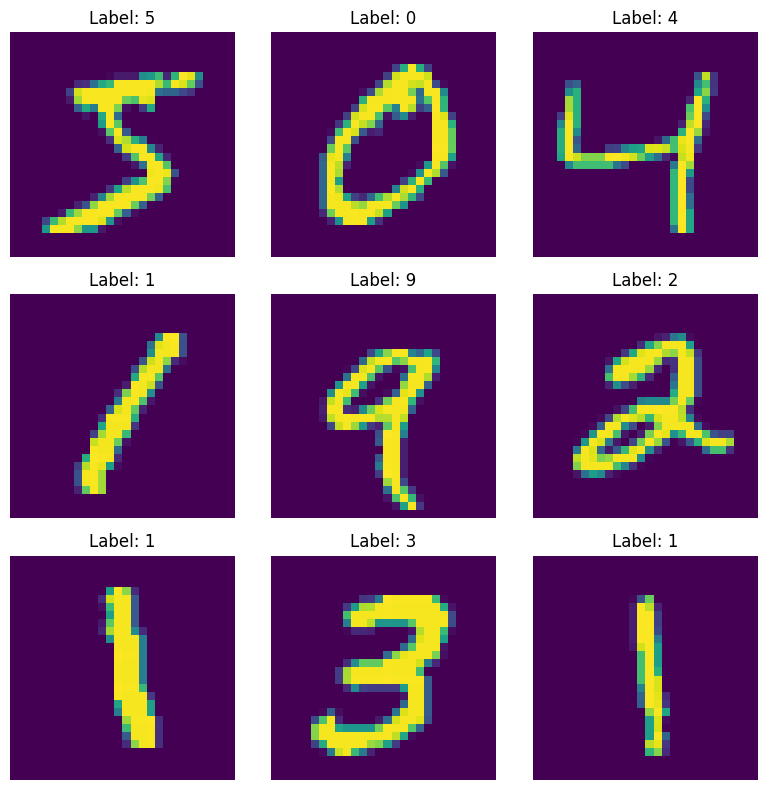

In [6]:
# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# Plot images
for i in range(3):
    for j in range(3):
        img, label = train_data[i * 3 + j]  # Accessing each image and label
        axs[i, j].imshow(img.squeeze())
        axs[i, j].set_title(f'Label: {label}')
        axs[i, j].axis('off')  # Hide axis

plt.tight_layout()
plt.show()

In [7]:

X_train=torch.flatten(train_data.data,1,2).to(torch.float64)

Y_train=torch.tensor([1 if i==5 else 0 for i in train_data.targets]).reshape(X_train.shape[0],1).to(torch.float64)

In [8]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [9]:
X_test=torch.flatten(test_data.data,1,2).to(torch.float64)

Y_test=torch.tensor([1 if i==5 else 0 for i in test_data.targets]).reshape(X_test.shape[0],1).to(torch.float64)

In [10]:
# Min max scaling of the training data

for i in range(X_train.shape[0]):
    X_train[i]=(X_train[i]-X_train[i].min())/(X_train[i].max()-X_train[i].min())


for i in range(X_test.shape[0]):
    X_test[i]=(X_test[i]-X_test[i].min())/(X_test[i].max()-X_test[i].min())

In [11]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

(torch.Size([60000, 784]),
 torch.Size([60000, 1]),
 torch.Size([10000, 784]),
 torch.Size([10000, 1]))

# Logistic Regression: Binary Classification

## Sigmoid Activation Function

In [12]:
def sigmoid(z):
    out=1/(1+torch.exp(-z))
    # for idx,val in enumerate(out):
    #     if val==1:
    #         out[idx]= val-1e-4
    #     elif val == 0:
    #         out[idx]=val+1e-4
    # print(f"out: {out}")
    return out 

In [13]:
W=torch.randn((X_train.shape[1],1),dtype=torch.float64)
b=torch.randn((1,1),dtype=torch.float64)

W.shape,b.shape,W.dtype,b.dtype

(torch.Size([784, 1]), torch.Size([1, 1]), torch.float64, torch.float64)

In [14]:
b

tensor([[-0.8209]], dtype=torch.float64)

In [24]:
loss_list_train=[]
loss_list_test=[]

In [47]:
for i in range(1):
    z=X_train@W+b
    # z1=(z-z.mean())/(z.std())
    # print(sigmoid(z1))
    a=sigmoid(z)
    # print(a)

    Loss= (-Y_train*torch.log(a)-(1-Y_train)*torch.log(1-a)).mean()
    

    loss_list_train.append(Loss.item())
    # dL_da= (-Y_train/a)+((1-Y_train)/(1-a))
    # da_dz=a*(1-a)
    # dz_dw=X_train

    # dL_dw=X_train.T@(dL_da*da_dz)/X_train.shape[0]
    dL_dw=(X_train.T@(a-Y_train))/X_train.shape[0]
    # dL_db=(dL_da*da_dz).sum()
    dL_db=(a-Y_train).mean()


    W-=0.01*dL_dw
    b-=0.01*dL_db

    # test
    z_test=X_test@W+b
    z_test=(z_test-z_test.mean()/(z_test.std()))
    a_test=sigmoid(z_test)

    Loss_test=(-Y_test*torch.log(a_test)-(1-Y_test)*torch.log(1-a_test)).mean()
    loss_list_test.append(Loss_test.item())
    pred=X_test@W+b
    


tensor([[0.8627],
        [0.7689],
        [0.8249],
        ...,
        [0.6392],
        [0.8073],
        [0.8612]], dtype=torch.float64)
tensor([[0.9315],
        [0.2713],
        [0.7274],
        ...,
        [0.0104],
        [0.5785],
        [0.9268]], dtype=torch.float64)


In [17]:
b

tensor([[-0.9026]], dtype=torch.float64)

In [31]:
min(loss_list_test)

1.2533881065644672

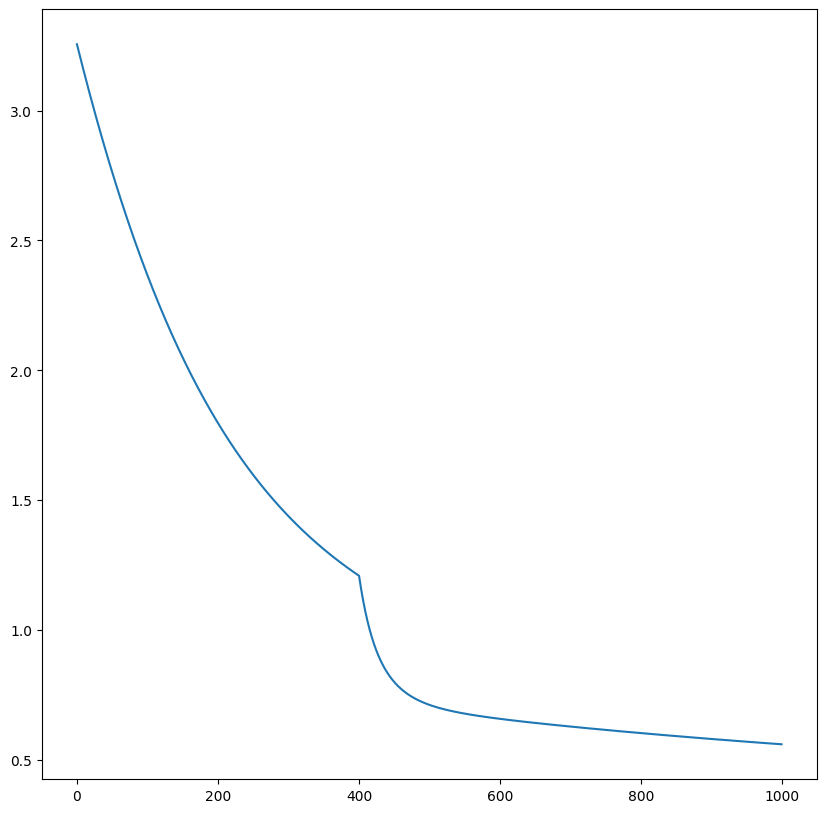

In [44]:
plt.figure(figsize=(10,10))
plt.plot(loss_list_train)
# plt.plot(loss_list_test)


plt.show()

In [45]:
pred=[1 if val>0.5 else 0 for val in a]

train_acc=torch.sum(torch.tensor(pred) == Y_train.reshape(1,-1))/X_train.shape[0]
train_acc

tensor(0.8773)

In [46]:
# test dataset prediction

y_testhat=X_test@W+b
a_test=sigmoid(y_testhat)

pred_test=[1 if val>0.5 else 0 for val in a_test]

test_acc=torch.sum(torch.tensor(pred_test) == Y_test.reshape(1,-1))/X_test.shape[0]
test_acc

tensor(0.8836)